# using Decision Tree 

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
reg_method= ['Decision Tree one level', 
            'Decision Tree multi level optimized', 
            'Forest regression', 
            'Linear model']
def print_model_performance(model, y, prediction, reg_method_id):
    # print ('coeffecient:', model.coef_)
    # print ('intercept: ', model.intercept_)

    print (f'Mean squared Error (MSE): {mean_squared_error(y, prediction):.2f}')
    print (f'Mean absolute Error (MAE): {mean_absolute_error(y, prediction):.2f}')
    print (f'Coeffecint of determination (R2): {r2_score(y, prediction):.2f}')
    # plt.figure()
    # p= sns.regplot(x=y, y=prediction, marker = '+')
    # p= p.set_title(reg_method[reg_method_id])
    

In [19]:
def reg_4_models(train_X, val_X, train_y, val_y):
    reg_fns = [reg_decision_tree_1, 
                    reg_decision_tree_max_leaf,
                    use_forest_regression,
                    use_linear_model] 
    all_reg = pd.DataFrame()
    for reg_model_id in range(4):
        print (20*'*', reg_method[reg_model_id],20*'*' )
        pred = reg_fns[reg_model_id](train_X, val_X, train_y, val_y)
        x = pd.DataFrame(val_y)
        x['predicted'] = pred
        x['Method'] = reg_method[reg_model_id]
        all_reg = pd.concat([all_reg, x])

    all_reg.to_csv(r'.\\out\\all_reg.csv')
    g = sns.FacetGrid(data=all_reg, col= 'Method', col_wrap=2)
    g.map(sns.regplot, all_reg.columns[0], 'predicted',  marker = '+')
    

In [5]:
def plt_one_graph(df, pivot, y_col):

    g = sns.FacetGrid(data=df, col=pivot, col_wrap=2)
    g.map(sns.regplot, y_col, pivot,  marker = '+')

# Regression Models

## Use Decision Tree Regression - One leaf

In [6]:
def reg_decision_tree_1(train_X, val_X, train_y, val_y):
    # Specify Model
    iowa_model = DecisionTreeRegressor(random_state=1)
    # Fit Model
    iowa_model.fit(train_X, train_y)

    # Make validation predictions and calculate mean absolute error
    val_predictions = iowa_model.predict(val_X)
    val_mae = mean_absolute_error(val_predictions, val_y)
    # print("Validation MAE: {:,.0f}".format(val_mae))
    print_model_performance(iowa_model, val_y, val_predictions, 0)
    return val_predictions


## Use Decision Tree with optimizating max_leaf_nodes

In [7]:
# model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [8]:
def reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y):
    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    # Write loop to find the ideal tree size from candidate_max_leaf_nodes
    mae=[]
    for i, max_leaf in enumerate(candidate_max_leaf_nodes):
        #print (i, max_leaf)
        x = get_mae(max_leaf, train_X, val_X, train_y, val_y)
        mae.append(x)
        print(f"Max leaf nodes: {max_leaf}  \t\t Mean Absolute Error:  {x:.2f}")
        
    # Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
    m = mae.index(min(mae))
    best_tree_size = candidate_max_leaf_nodes[m]

    final_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=0)
    # fit the final model 
    final_model.fit(X, y)
    pred = final_model.predict(val_X)
    print_model_performance(final_model, val_y, pred, 1)
    return pred

## Use Random Forest regression model

In [9]:

# from sklearn.metrics import mean_absolute_error
def use_forest_regression(train_X, val_X, train_y, val_y):
    forest_model = RandomForestRegressor(random_state=1)
    forest_model.fit(train_X, train_y)
    melb_preds = forest_model.predict(val_X)
    print_model_performance(forest_model, val_y, melb_preds, 2)
    return melb_preds

## Use Linear model regression

In [10]:
def use_linear_model(train_X, eval_X, train_y, eval_y):
    model = linear_model.LinearRegression()
    model.fit(train_X, train_y)
    pred = model.predict(eval_X)
    print_model_performance(model, eval_y, pred,3)
    # print ('Mead squared Error (MSE):', mean_squared_error(val_y, pred))
    return pred

# Regression analysis of "train data set" using 4 methods

In [24]:
iowa_file_path = r".\data\train.csv"
home_data = pd.read_csv(iowa_file_path)

y = home_data.SalePrice
# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

reg_4_models(train_X, val_X, train_y, val_y,'SalePrice')


FileNotFoundError: [Errno 2] No such file or directory: '.\\data\\train.csv'

# Regression Analysis of "Boston House data" 

In [ ]:
file_path = r".\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

reg_4_models(train_X, val_X, train_y, val_y)

# Old Code

In [ ]:
file_path = r"C:\Yahia\Python\ML\data\BostonHousing.csv"
boston_data = pd.read_csv(file_path)

y= boston_data.medv
X = boston_data.drop('medv', axis='columns')

# # Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.2, random_state=1)

print ('************ Decision Tree one level ***************')
pred = reg_decision_tree_1(train_X, val_X, train_y, val_y)
all_reg = pd.DataFrame(val_y)
all_reg['pred'] = pred
all_reg['id'] = reg_method[0]
print ('\n************ Decision Tree multi level optimized ***************')
pred = reg_decision_tree_max_leaf(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[1]
all_reg = pd.concat([all_reg, x])

print ('\n************ User Forest model regression ***************')
pred = use_forest_regression(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[2]
all_reg = pd.concat([all_reg, x])

print ('\n************ Linear Model ***************')
pred = use_linear_model(train_X, val_X, train_y, val_y)

x = pd.DataFrame(val_y)
x['pred'] = pred
x['id'] = reg_method[3]
all_reg = pd.concat([all_reg, x])
all_reg.columns = ['medv', 'predicted', 'Method']
plt_one_graph(all_reg, 'Method')

# Diabetes data set from skilearn

******************** Decision Tree one level ********************
Mean squared Error (MSE): 5890.85
Mean absolute Error (MAE): 62.26
Coeffecint of determination (R2): -0.07
******************** Decision Tree multi level optimized ********************
Max leaf nodes: 5  		 Mean Absolute Error:  46.95
Max leaf nodes: 25  		 Mean Absolute Error:  50.54
Max leaf nodes: 50  		 Mean Absolute Error:  53.68
Max leaf nodes: 100  		 Mean Absolute Error:  58.39
Max leaf nodes: 250  		 Mean Absolute Error:  60.16
Max leaf nodes: 500  		 Mean Absolute Error:  60.17
Mean squared Error (MSE): 556.95
Mean absolute Error (MAE): 18.58
Coeffecint of determination (R2): 0.90
******************** Forest regression ********************
Mean squared Error (MSE): 2759.00
Mean absolute Error (MAE): 43.31
Coeffecint of determination (R2): 0.50
******************** Linear model ********************
Mean squared Error (MSE): 2265.57
Mean absolute Error (MAE): 38.66
Coeffecint of determination (R2): 0.59


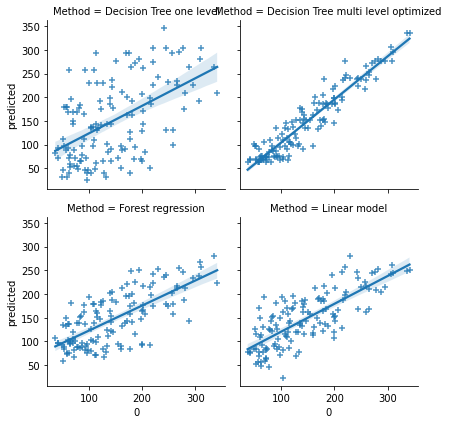

In [25]:
from sklearn import datasets

# diabetes = datasets.load_diabetes(return_X_y=True)
diabetes = datasets.load_diabetes()
y = diabetes.target
X = diabetes.data

# Split into validation and training data
# train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size =0.3, random_state=9)

reg_4_models(train_X, val_X, train_y, val_y)

In [42]:
# diabetes.feature_names, diabetes.target, diabetes.data
pd.DataFrame(diabetes)

ValueError: Per-column arrays must each be 1-dimensional